# Likelihood evaluations for Palanque-Delabrouille et al. (2013)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
# temporal
import camb
# our own modules
import simplest_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import camb_cosmo
import fit_linP
import recons_cosmo
import compute_likelihood

### Specify suite of simulations to use, read P1D arxiv and setup simplest emulator

In [2]:
basedir='/Users/font/CosmoData/test_sim_emulator/test_medium/'
#basedir='../mini_sim_suite/'
skewers_label='Ns100_wM0.1'
emu=simplest_emulator.SimplestEmulator(basedir,skewers_label,verbose=True)

latin hyper-cube data {'param_space': {'Om_star': {'ip': 0, 'min_val': 0.955, 'max_val': 0.975, 'z_star': 3.0, 'latex': '$\\Omega_\\star$'}, 'Delta2_star': {'ip': 1, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'mu_He': {'ip': 2, 'min_val': 0.5, 'max_val': 2.0, 'latex': '$\\mu_{\\rm He}$'}}, 'nsamples': 5, 'samples': {'0': [0.961, 0.39, 1.25], '1': [0.965, 0.31, 0.9500000000000001], '2': [0.969, 0.35, 1.55], '3': [0.973, 0.27, 0.65], '4': [0.957, 0.43000000000000005, 1.85]}}
simulation suite has 5 samples
0 sample has sim params = [0.961, 0.39, 1.25]
simulation has 7 redshifts
/Users/font/CosmoData/test_sim_emulator/test_medium//sim_pair_0 does not have this snapshot 0
1 sample has sim params = [0.965, 0.31, 0.9500000000000001]
simulation has 7 redshifts
/Users/font/CosmoData/test_sim_emulator/test_medium//sim_pair_1 does not have this snapshot 0
2 sample has sim params = [0.969, 0.35, 1.55]
simulation has 7 redshifts
/Users/font/Cosmo

### Read P1D data from Palanque-Delabrouille et al. (2013)

In [3]:
basedir='../../p1d_data/data_files/PD2013/'
data=data_PD2013.P1D_PD2013(basedir=basedir)
zs=data.z
# while testing, use only a handful of bins
zs=data.z[::4]
Nz=len(zs)

### Setup nuisance models

In [4]:
mf_model=mean_flux_model.MeanFluxModel()
T_model=thermal_model.ThermalModel()

In [5]:
z=3.4
print('<F>(z=%.2f) = %f'%(z,mf_model.get_mean_flux(z)))
print('T_0(z=%.2f) = %f'%(z,T_model.get_T0(z)))
print('gamma(z=%.2f) = %f'%(z,T_model.get_gamma(z)))

<F>(z=3.40) = 0.542428
T_0(z=3.40) = 10000.000000
gamma(z=3.40) = 1.456532


### Setup cosmological model

In [6]:
# specify cosmology
cosmo = camb_cosmo.get_cosmology(mnu=0.15, ns=0.965, omch2=0.12)
# print relevant information about the cosmology object
camb_cosmo.print_info(cosmo)

H0 = 6.7000E+01, Omega_b h^2 = 2.2000E-02, Omega_c h^2 = 1.2000E-01, Omega_k = 0.0000E+00, Omega_nu h^2 = 1.6128E-03, T_CMB = 2.7255E+00, A_s = 2.1000E-09, n_s = 9.6500E-01, alpha_s = 0.0000E+00


In [7]:
# compute linear power parameters, around z_star and kp_kms
z_star=3.0
kp_kms=0.009
linP_model=fit_linP.LinearPowerModel(cosmo,z_star=z_star,k_units='kms',kp=kp_kms)
linP_model.get_params()

in parameterize_cosmology_kms, kp_Mpc = 0.693369153628


{'Delta2_star': 0.34359089153174016,
 'alpha_star': -0.21586983258446132,
 'f_star': 0.97514327990258953,
 'g_star': 0.968209492732573,
 'n_star': -2.300572652881717}

### Use fiducial cosmology to reconstruct input cosmology

In [8]:
# setup fiducial cosmology
cosmo_fid = camb_cosmo.get_cosmology()
# reconstruct cosmology using linear parameter model (at z_star, kp_kms)
rec_cosmo=recons_cosmo.ReconstructedCosmology(linP_model,cosmo_fid)
# compute linear power parameters at each redshift (in Mpc)
linP_Mpc_params=rec_cosmo.get_linP_Mpc_params(zs)

in parameterize_cosmology_kms, kp_Mpc = 0.689649775248
Note: redshifts have been re-sorted (earliest first)


### For each redshift, plot data vs model

2.2 model {'Delta2_p': 0.52940508668690001, 'n_p': -2.3007135087498813, 'alpha_p': -0.10788136894348764, 'f_p': 0.95899824656437238, 'mF': 0.80075859414516326, 'gamma': 1.5523173420452847, 'sigT_Mpc': 0.13071399425598651}
3.0 model {'Delta2_p': 0.3963222761532938, 'n_p': -2.3007135087498813, 'alpha_p': -0.10788136894348682, 'f_p': 0.97514327324728511, 'mF': 0.63650570143405727, 'gamma': 1.4845625705324339, 'sigT_Mpc': 0.1186885644151414}
3.8 model {'Delta2_p': 0.30758350505290799, 'n_p': -2.3007135087498805, 'alpha_p': -0.10788136894348826, 'f_p': 0.98244156956366979, 'mF': 0.44633357154790776, 'gamma': 1.4314041022302444, 'sigT_Mpc': 0.10907211376093627}


(0.005, 0.6)

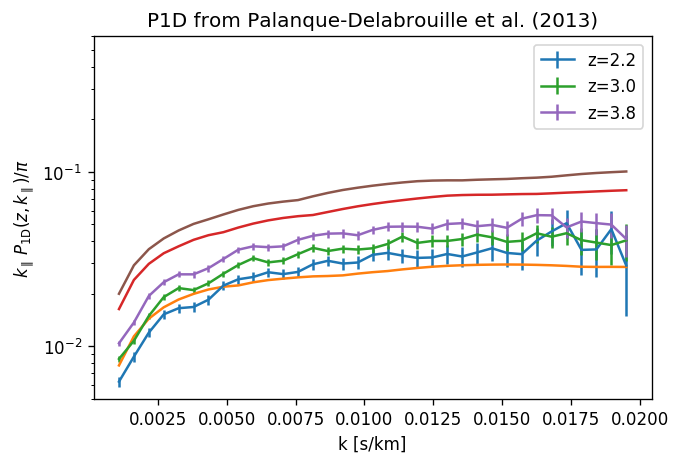

In [9]:
for iz in range(Nz):
    # acess data for this redshift
    z=zs[iz]
    p1d=data.get_Pk_iz(iz)
    cov=data.get_cov_iz(iz)
    # get emulator parameters for linear power, at this redshift (in Mpc)
    model=linP_Mpc_params[iz]
    # get emulator parameters for nuisance models, at this redshift
    model['mF']=mf_model.get_mean_flux(z)
    model['gamma']=T_model.get_gamma(z)
    T0=T_model.get_T0(z)
    sigT_kms=thermal_model.thermal_broadening_kms(T0)
    dkms_dMpc=rec_cosmo.reconstruct_Hubble(z)/(1+z)
    model['sigT_Mpc']=sigT_kms/dkms_dMpc
    print(z,'model',model)
    # emulate p1d
    emu_k_Mpc, emu_p1d_Mpc = emu.emulate_p1d(model)
    emu_k_kms = emu_k_Mpc / dkms_dMpc
    emu_P_kms = emu_p1d_Mpc * dkms_dMpc
    k_kms=data.k
    emu_p1d = np.interp(k_kms,emu_k_kms,emu_P_kms)
    # plot everything
    plt.errorbar(k_kms,p1d*k_kms/np.pi,yerr=np.sqrt(np.diag(cov))*k_kms/np.pi,label='z=%.1f'%z)
    plt.plot(k_kms,emu_p1d*k_kms/np.pi)
plt.yscale('log')
plt.legend()
plt.title('P1D from Palanque-Delabrouille et al. (2013)')
plt.xlabel('k [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
plt.ylim(0.005,0.6)

In [10]:
compute_likelihood.get_chi2(data,cosmo_fid,emu,rec_cosmo,mf_model,T_model,linP_Mpc_params)

10604.466051977586

### Plot chi2 vs mean optical depth parameter

In [11]:
tau_0 = np.linspace(2.8,3.5,20)
Ntau=len(tau_0)

In [12]:
chi2_tau=np.empty(Ntau)
for i in range(Ntau):
    tau=tau_0[i]
    mf_model=mean_flux_model.MeanFluxModel(z_tau=3.0,ln_tau_coeff=[tau, -0.7946])
    chi2_tau[i]=compute_likelihood.get_chi2(data,cosmo_fid,emu,rec_cosmo,mf_model,T_model,linP_Mpc_params)

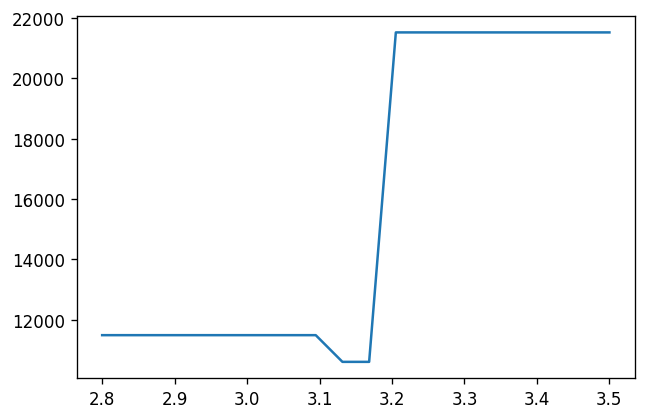

In [13]:
plt.plot(tau_0,chi2_tau)